# LOCAL SEARCH - ANÁLISE DE RESULTADOS

 - ITA | PG-CTE-S | TE-282 - Meta-heurísticas
 - Professor Dr. Angelo Passaro
 - Aluno: Rafael Caneiro de Oliveira
 - Versao: 0.1
 - Data: 26/10/2021

## Bibliotecas | Parâmetros | Funções

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

PATH = Path.cwd().parent
RAW_PATH = Path(PATH, "./data/raw/") 
LOG_PATH = Path(PATH, "./data/log/")
print(LOG_PATH)


/home/rco/github/s_metaheuristic/data/log


In [15]:
def read_port_files(n_port):
    filepath = Path(RAW_PATH, 'port' + str(n_port) + '.txt')
    with open(filepath) as fp:
        # quantidade de ativos no portfolio
        n_assets = int(fp.readline())
        # armazena as estatisticas do ativo
        r_mean = []
        r_std = []
        for n in range(n_assets):
            line = fp.readline()
            r_mean.append(float(line.strip().split()[0]))
            r_std.append(float(line.strip().split()[1]))

        # obtem o restante da matriz de covariancia
        cnt = 32
        i = []
        j = []
        cov = []
        line = fp.readline()
        while line:
            i.append(int(line.strip().split(' ')[0]))
            j.append(int(line.strip().split(' ')[1]))
            cov.append(float(line.strip().split(' ')[2]))
            line = fp.readline()
    fp.close()
    # retorna dataframe com estatisticas dos ativos do portfolio
    df_stats = pd.DataFrame({'port':n_port,
                             'i':[i_+1 for i_ in range(n_assets)],
                             'r_mean':r_mean,
                             'r_std':r_std})
    print(df_stats.shape)

    # retorna dataframe com matriz de covariancia dos ativos do portfolio
    df_cov_mx = pd.DataFrame({'port':n_port,
                             'i':i,
                             'j':j,
                             'cov':cov})
    print(df_cov_mx.shape)
    return df_stats, df_cov_mx

## Carrega Dados

In [16]:
df_stats_list = []
df_cov_mx_list =[]
for p in range(1,6,1):
    df_stats, df_cov_mx = read_port_files(p)
    df_stats_list.append(df_stats)
    df_cov_mx_list.append(df_cov_mx)
    
df_stats = pd.concat(df_stats_list)
df_cov_mx = pd.concat(df_cov_mx_list)

(31, 4)
(496, 4)
(85, 4)
(3655, 4)
(89, 4)
(4005, 4)
(98, 4)
(4851, 4)
(225, 4)
(25425, 4)


In [17]:
portfolios = {
    1:'Hang Seng - Hong Kong',
    2:'DAX - German Blue Chips',
    3:'FTSE - London',
    4:"S&P - Standard and Poor's 500 - US",
    5:'Nikkei - Tokyo'
}
df_stats['portfolio'] = df_stats.port.map(portfolios)
df_cov_mx['portfolio'] = df_cov_mx.port.map(portfolios)

In [18]:
uefs = []
for port in range(5):
    uef = pd.read_csv(Path(RAW_PATH, 'portef' + str(port+1) + '.txt'), header=None, sep='\s+')
    uef.columns = ['mean_return', 'var_return']
    uef['port'] = port + 1
    uefs.append(uef)
uef = pd.concat(uefs, ignore_index=True).reset_index(drop=True)
uef['portfolio'] = uef.port.map(portfolios)
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


In [19]:
all_dfs = []
best_dfs = []
LOGs = str(LOG_PATH) + '/*.csv'

c = 0
for file in glob.glob(str(LOGs)):
    filename = file[file.find('/log/')+5:]
    try:
        df = pd.read_csv(file, low_memory=False, sep=',', quotechar='"')
        c = c + 1
    except:
        print('Arquivo não importado: {}'.format(filename))
    df['filename'] = filename
    all_dfs.append(df)
    best_dfs.append(df.iloc[-1:])

all_data = pd.concat(all_dfs, ignore_index=True).reset_index(drop=True)
all_data.rename({'move_strategy':'move_str',
                 'selection_strategy':'selec_str'}, axis=1, inplace=True)

best_data = pd.concat(best_dfs, ignore_index=True).reset_index(drop=True)
best_data.rename({'move_strategy':'move_str',
                  'selection_strategy':'selec_str'}, axis=1, inplace=True)

print('Importados {} arquivos'.format(c))

# for col in all_data.columns:
#     all_data[col] = pd.to_numeric(all_data[col])

# for col in best_data.columns:
#     best_data[col] = pd.to_numeric(best_data[col])

Importados 608 arquivos


In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45512 entries, 0 to 45511
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iter        45512 non-null  int64  
 1   move        45512 non-null  object 
 2   improve     45512 non-null  bool   
 3   obj         45512 non-null  float64
 4   return      45512 non-null  float64
 5   n_assets    45512 non-null  int64  
 6   qX          45512 non-null  int64  
 7   qN          45512 non-null  int64  
 8   qNv         45512 non-null  int64  
 9   iter_time   45512 non-null  float64
 10  max_iter    45512 non-null  int64  
 11  neighbours  45512 non-null  int64  
 12  alpha       45512 non-null  float64
 13  exp_return  45512 non-null  float64
 14  n_port      45512 non-null  int64  
 15  k_min       45512 non-null  int64  
 16  k_max       45512 non-null  int64  
 17  move_str    45512 non-null  object 
 18  seed        45512 non-null  int64  
 19  selec_str   45512 non-nul

In [21]:
all_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iter,45512.0,NaN,NaN,NaN,59.589449,71.513338,0.0,18.0,37.0,67.0,523.0
move,45512,3,TID,21503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improve,45512,2,False,31237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
obj,45512.0,NaN,NaN,NaN,0.117312,0.091869,0.000665,0.021727,0.119386,0.203556,0.275622
return,45512.0,NaN,NaN,NaN,0.004288,0.002251,0.001,0.002692,0.003703,0.004885,0.010804
n_assets,45512.0,NaN,NaN,NaN,5.92536,2.767167,2.0,3.0,6.0,8.0,10.0
qX,45512.0,NaN,NaN,NaN,5.92536,2.767167,2.0,3.0,6.0,8.0,10.0
qN,45512.0,NaN,NaN,NaN,1000.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0
qNv,45512.0,NaN,NaN,NaN,342.405717,352.424389,0.0,0.0,314.0,641.0,1000.0
iter_time,45512.0,NaN,NaN,NaN,0.420889,0.23232,0.235304,0.308642,0.333821,0.361164,1.525841


## Portfólios

### Geral

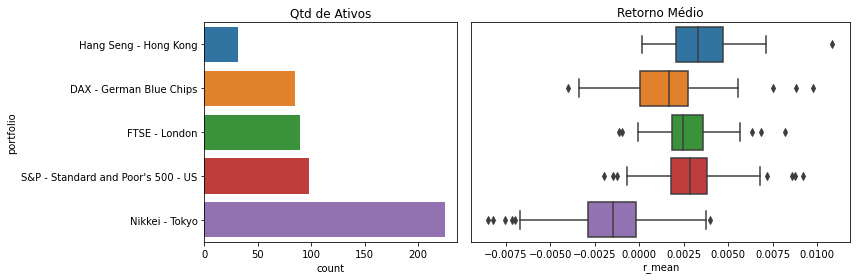

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [1, 1.5]})
sns.countplot(data=df_stats, y='portfolio', ax=ax[0])
ax[0].title.set_text('Qtd de Ativos')
sns.boxplot(data=df_stats, y='portfolio', x='r_mean', ax=ax[1])
ax[1].title.set_text("Retorno Médio")
ax[1].get_yaxis().set_ticks([])
ax[1].set_ylabel('')
fig.tight_layout()

### Matriz de Covariância

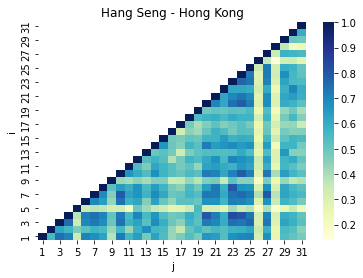

In [23]:
portfolio = 1
df_cov_pivot = df_cov_mx[df_cov_mx.port==portfolio].pivot(index='i', columns='j', values='cov')
sns.heatmap(df_cov_pivot.iloc[::-1], cmap="YlGnBu") 
plt.title(portfolios[portfolio])
ax=ax

### Fronteiras de Eficiência Irrestrira - UEF

In [24]:
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


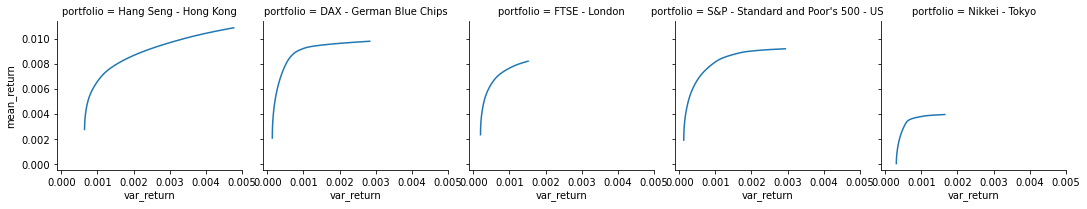

In [25]:
g = sns.relplot(data=uef, y='mean_return', x='var_return', col='portfolio', kind='line', height=3)
ax=ax

## Curvas de Aprendizado

### Avaliação do Impacto da Seed

In [26]:
# g = sns.FacetGrid(
#     data=all_data, row='seed', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

In [27]:
# g = sns.FacetGrid(
#     data=all_data, row='seed', col='selec_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Tipo de Move

In [28]:
# g = sns.FacetGrid(
#     data=all_data, row='selec_str', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Impacto do Retorno Experado

In [29]:
# g = sns.FacetGrid(
#     data=all_data, row='exp_return', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

## Análise Best - Portfólio 1

In [30]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [31]:
print(best_data.shape)
best_data.head()

(608, 23)


,iter,move,improve,obj,return,n_assets,qX,qN,qNv,iter_time,...,exp_return,n_port,k_min,k_max,move_str,seed,selec_str,X,Z,filename
0,50,iDR,False,0.243820,0.002946,10,10,1000,0,0.324976,...,0.009,1,2,10,iDR,21,best,"[0.05526, 0.161636, 0.072166, 0.044282, 0.1388...","[0, 1, 5, 13, 15, 19, 20, 23, 25, 26]",log_local_search_20211102_120230_323768.csv
1,50,TID,False,0.185236,0.003508,4,4,1000,0,0.948981,...,0.008,1,2,10,best,91,first,"[0.274075, 0.321385, 0.34339, 0.06115]","[0, 7, 12, 16]",log_local_search_20211102_115943_978394.csv
2,50,TID,False,0.135095,0.004732,4,4,1000,0,0.995241,...,0.009,1,2,10,best,31,random,"[0.141004, 0.176668, 0.421681, 0.260648]","[5, 7, 8, 27]",log_local_search_20211102_120446_598964.csv
3,50,TID,False,0.159049,0.003178,8,8,1000,0,0.997168,...,0.006,1,2,10,best,69,best,"[0.152135, 0.068652, 0.131072, 0.094034, 0.193...","[13, 14, 15, 16, 18, 21, 25, 27]",log_local_search_20211102_120643_796828.csv
4,82,iDR,False,0.002007,0.003150,2,2,1000,507,0.346551,...,0.003,1,2,10,iDR,39,random,"[0.433951, 0.010799]","[8, 28]",log_local_search_20211102_120433_887333.csv


In [32]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,608.0,73.855263,5.829496e+01,50.000000,50.000000,50.000000,69.250000,523.000000
obj,608.0,0.132292,9.906394e-02,0.000665,0.012406,0.158324,0.225079,0.275622
return,608.0,0.003995,2.164634e-03,0.001000,0.002518,0.003502,0.004681,0.010780
n_assets,608.0,5.220395,2.656150e+00,2.000000,2.000000,5.000000,7.000000,10.000000
qX,608.0,5.220395,2.656150e+00,2.000000,2.000000,5.000000,7.000000,10.000000
qN,608.0,1000.000000,0.000000e+00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
qNv,608.0,239.779605,3.513327e+02,0.000000,0.000000,0.000000,518.500000,991.000000
iter_time,608.0,0.443997,2.550319e-01,0.258396,0.317731,0.334928,0.357095,1.175673
max_iter,608.0,1000.000000,0.000000e+00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
neighbours,608.0,1000.000000,0.000000e+00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000


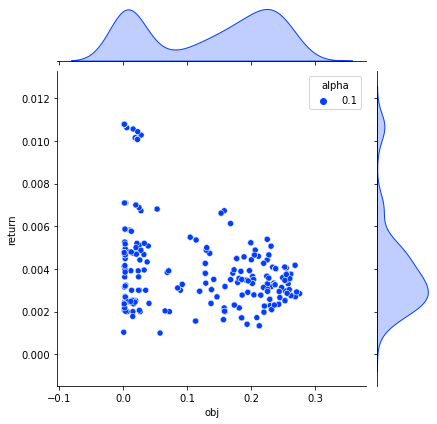

In [33]:
sns.jointplot(data=best_data, x='obj', y='return', hue='alpha', palette='bright')

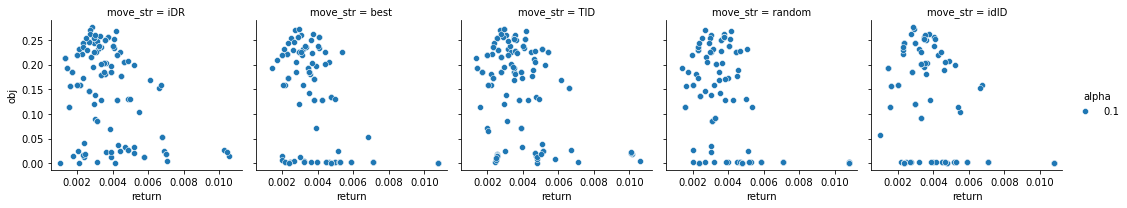

In [34]:
g = sns.FacetGrid(data=best_data, col='move_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

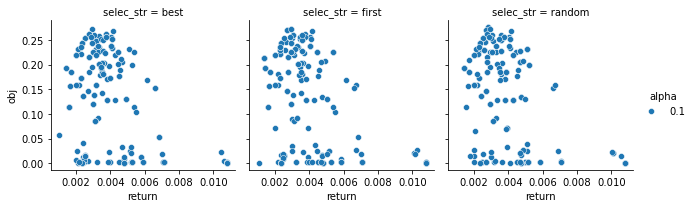

In [35]:
g = sns.FacetGrid(data=best_data, col='selec_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

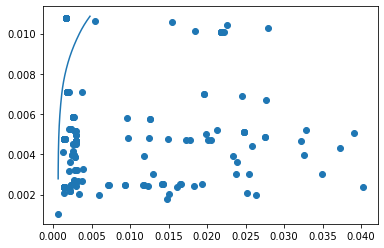

In [36]:
data = best_data[best_data['obj']<0.05]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])

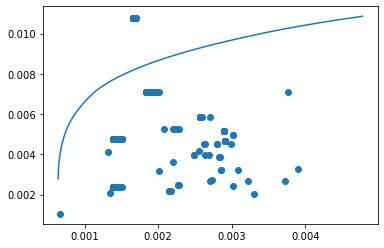

In [37]:
data = best_data[best_data['obj']<0.005]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])

In [38]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .count()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

exp_return          0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  \
move_str selec_str                                                           
TID      best         4.0    8.0    3.0    3.0    7.0    9.0    3.0    6.0   
         first        5.0    6.0    4.0    2.0    7.0    3.0    2.0    2.0   
         random       2.0    5.0    5.0    4.0    5.0    3.0   15.0    3.0   
best     best         4.0    7.0    3.0    6.0    2.0    6.0    3.0    6.0   
         first        2.0    4.0    NaN    2.0    7.0    2.0    3.0    5.0   
         random       1.0    3.0    2.0    4.0    1.0    4.0    3.0    3.0   
iDR      best         5.0    7.0    6.0    1.0    6.0    6.0    4.0    4.0   
         first        5.0    3.0    4.0    5.0    3.0    5.0    3.0    2.0   
         random       2.0    3.0    5.0    6.0    7.0    3.0    5.0    3.0   
idID     best         4.0    2.0    5.0    2.0    4.0    1.0    4.0    2.0   
         first        6.0    4.0    3.0    4.0    3.0    4.0    2.0    8.0   
         random       4.0    4.0    3.0    4.0    2.0    3.0    5.0    3.0   
random   best         3.0    2.0    6.0    4.0    5.0    4.0    4.0    1.0   
         first        2.0    7.0    7.0    6.0    2.0    4.0    7.0    3.0   
         random       4.0    3.0    3.0    4.0    2.0    4.0    5.0    5.0   

exp_return          0.009  0.010  
move_str selec_str                
TID      best         5.0    3.0  
         first        4.0    2.0  
         random       5.0    7.0  
best     best         2.0    3.0  
         first        6.0    5.0  
         random       4.0    5.0  
iDR      best         4.0    5.0  
         first        5.0    4.0  
         random       4.0    4.0  
idID     best         5.0    2.0  
         first        4.0    4.0  
         random       NaN    4.0  
random   best         2.0    6.0  
         first        3.0    6.0  
         random       8.0    2.0

In [39]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .min()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

exp_return             0.001     0.002     0.003     0.004     0.005  \
move_str selec_str                                                     
TID      best       0.005487  0.003019  0.230940  0.137910  0.085056   
         first      0.001380  0.011799  0.009552  0.001836  0.019818   
         random     0.020473  0.017812  0.021745  0.021745  0.157761   
best     best       0.001381  0.001655  0.001837  0.001381  0.001841   
         first      0.001479  0.001384       NaN  0.001381  0.001655   
         random     0.002274  0.003018  0.002202  0.002889  0.180954   
iDR      best       0.012582  0.001345  0.012582  0.156647  0.113055   
         first      0.000665  0.011848  0.019568  0.173685  0.027892   
         random     0.014781  0.015366  0.002007  0.001313  0.128245   
idID     best       0.001381  0.001386  0.001655  0.001672  0.113055   
         first      0.001383  0.001384  0.002481  0.001656  0.001910   
         random     0.002009  0.001381  0.001381  0.001655  0.001655   
random   best       0.001508  0.001415  0.001383  0.002260  0.001687   
         first      0.002910  0.001384  0.001691  0.001408  0.001655   
         random     0.001383  0.001381  0.001656  0.001655  0.001672   

exp_return             0.006     0.007     0.008     0.009     0.010  
move_str selec_str                                                    
TID      best       0.129755  0.211320  0.167747  0.128286  0.224314  
         first      0.193563  0.219264  0.070922  0.024787  0.024787  
         random     0.181314  0.070922  0.128286  0.177245  0.070922  
best     best       0.024787  0.171321  0.052873  0.173685  0.202273  
         first      0.185236  0.130458  0.157761  0.119386  0.141455  
         random     0.070922  0.001654  0.135095  0.135095  0.128245  
iDR      best       0.085056  0.052873  0.180954  0.243820  0.178917  
         first      0.177245  0.202273  0.128245  0.052873  0.137910  
         random     0.185236  0.158324  0.085056  0.157917  0.130458  
idID     best       0.261912  0.119386  0.092156  0.128286  0.230940  
         first      0.113055  0.156647  0.104652  0.156647  0.152900  
         random     0.001655  0.001656  0.158324       NaN  0.193563  
random   best       0.001655  0.113849  0.214939  0.253790  0.085056  
         first      0.092156  0.001655  0.181314  0.085056  0.092156  
         random     0.001656  0.001881  0.156647  0.024787  0.231035

In [40]:
best_best_data = best_data.groupby(['exp_return'], as_index=False)['obj'].min()
print(best_best_data.shape)
best_best_data.head()

(10, 2)


,exp_return,obj
0,0.001,0.000665
1,0.002,0.001345
2,0.003,0.001381
3,0.004,0.001313
4,0.005,0.001655


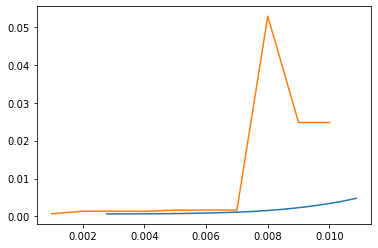

In [41]:
plt.plot(uef[uef.port==1].mean_return, uef[uef.port==1].var_return)
plt.plot(best_best_data.exp_return, best_best_data.obj)